# 로지스틱 회귀

In [13]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [14]:
# 1. 입출력 정의
np.random.seed(42)
num_sample = 500 # 샘플 500개

In [15]:
# 1-1. class 1
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1, 0],  # x에 퍼진 정도
                  [0, 1]])  # y에 퍼진 정도

data_1 = np.random.multivariate_normal(mean_1, cov_1, num_sample)

# 1-2. class 0
mean_0 = np.array([-1.0, -1.0])
cov_0 = np.array([[1, 0],  # x에 퍼진 정도
                  [0, 1]])  # y에 퍼진 정도
data_0 = np.random.multivariate_normal(mean_0, cov_0, num_sample)

data = np.vstack((data_1, data_0))
data = torch.from_numpy(data).float()
labels = np.ones(num_sample*2)
labels[num_sample:] = 0
labels = torch.from_numpy(labels).view(-1, 1).float()

In [16]:
# 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input, output):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input, output)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out


model = LogisticRegression(2, 1)

In [17]:
# 손실함수 정의
loss_fn = nn.BCELoss()
# 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
epochs = 1000
losses = []

# 학습 반복
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch == 0:
        print(f"Epoch[0], Loss : {loss.item()}")
    if (epoch+1) % 100 == 0:
        print(f"Epoch[{epoch+1}/{epochs}], Loss : {loss.item():.4f}")

Epoch[0], Loss : 0.9956235289573669
Epoch[100/1000], Loss : 0.5256
Epoch[200/1000], Loss : 0.3792
Epoch[300/1000], Loss : 0.3174
Epoch[400/1000], Loss : 0.2842
Epoch[500/1000], Loss : 0.2636
Epoch[600/1000], Loss : 0.2497
Epoch[700/1000], Loss : 0.2396
Epoch[800/1000], Loss : 0.2321
Epoch[900/1000], Loss : 0.2262
Epoch[1000/1000], Loss : 0.2215


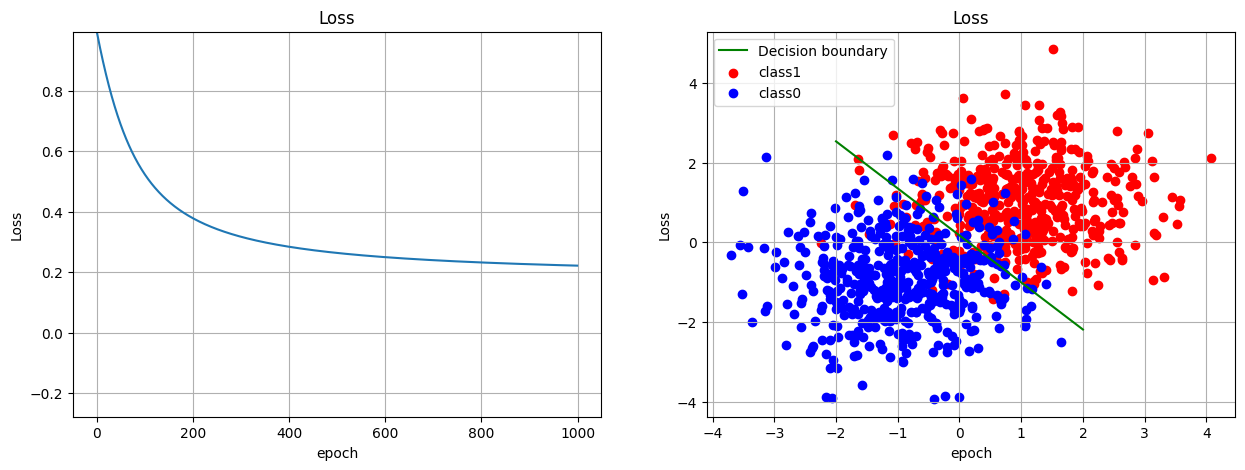

In [33]:
# 결과 시각화

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.ylim(min(losses)-0.5, max(losses))
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.grid()
plt.subplot(1, 2, 2)
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()

x1 = np.array([-2, 2])
x2 = (-b-w[0][0]*x1)/w[0][1]
#  0 = w1 x1 + w2 x2 + b
# w2 x2 = -b - w1 x1
# x2 = (-b - w1 x1) / w1

plt.plot(x1, x2, color="g", label="Decision boundary")  # 결정 경계선
plt.scatter(data_1[:, 0], data_1[:, 1], color="r", label="class1")
plt.scatter(data_0[:, 0], data_0[:, 1], color="b", label="class0")
plt.legend()
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.grid()